Index(['datetime', 'load_FC', 'load_RE', 'Solar_FC', 'Wind_offshore_FC',
       'Wind_onshore_FC', 'DK1_Accepted_Down_Volume_(MW)',
       'DK1_Accepted_Up_Volume_(MW)', 'DK1_Imbalance_Price_(EUR)',
       'DK2_Accepted_Down_Volume_(MW)', 'DK2_Accepted_Up_Volume_(MW)',
       'lambda_IM', 'Biomass_RE', 'Fossil_Gas_RE', 'Fossil_Hard_coal_RE',
       'Fossil_Oil_RE', 'Solar_RE', 'Waste_RE', 'Wind_offshore_RE',
       'Wind_onshore_RE', 'lambda_DA_RE', 'lambda_DA_FC', 'energy_RE',
       'energy_FC', 'missing_capacity_RE', 'diff_markets_RE',
       'abs_diff_markets_RE', 'system_state_RE', 'date',
       'lambda_DA_FC_normalized',
       'lambda_DA_FC_zeta_1.0_mu_-25.066601682263762',
       'lambda_DA_FC_zeta_1.0_mu_-0.21790725396844046',
       'lambda_DA_FC_zeta_1.0_mu_0.23181212501333637',
       'lambda_DA_FC_zeta_1.0_mu_34.34509867802557',
       'energy_FC_zeta_0.3550017391908838_mu_0.0',
       'energy_FC_zeta_0.3550017391908838_mu_0.19735466426337947',
       'energy_FC_zeta_0.35

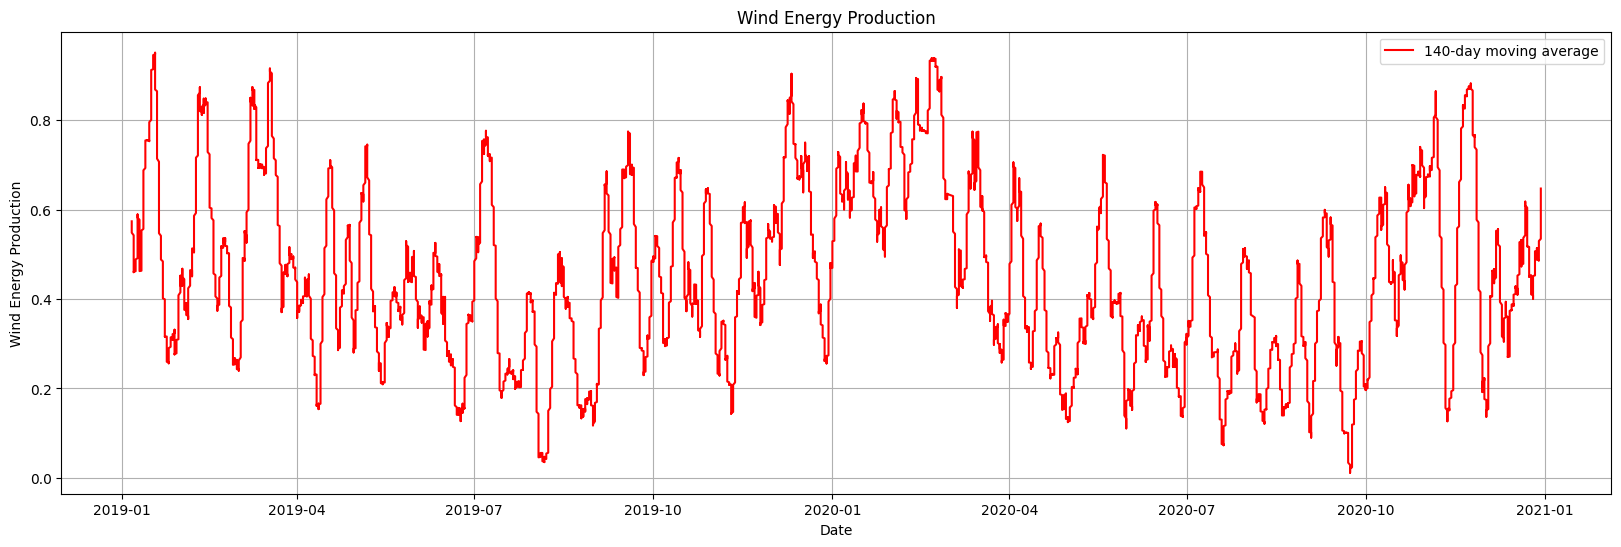

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../data/processed/data.csv', index_col=0)
print(data.columns)

data['date'] = pd.to_datetime(data['date'])

#plot the development of wind energy production
fig = plt.figure(figsize=(20, 6))
#plt.plot(data['date'], data['energy_RE'], label='Wind Energy Production')
plt.plot(data['date'], data['energy_RE'].rolling(window=140).mean(), label='140-day moving average', color='red')
plt.xlabel('Date')
plt.ylabel('Wind Energy Production')
plt.title('Wind Energy Production')
plt.legend()
plt.grid()
plt.show()

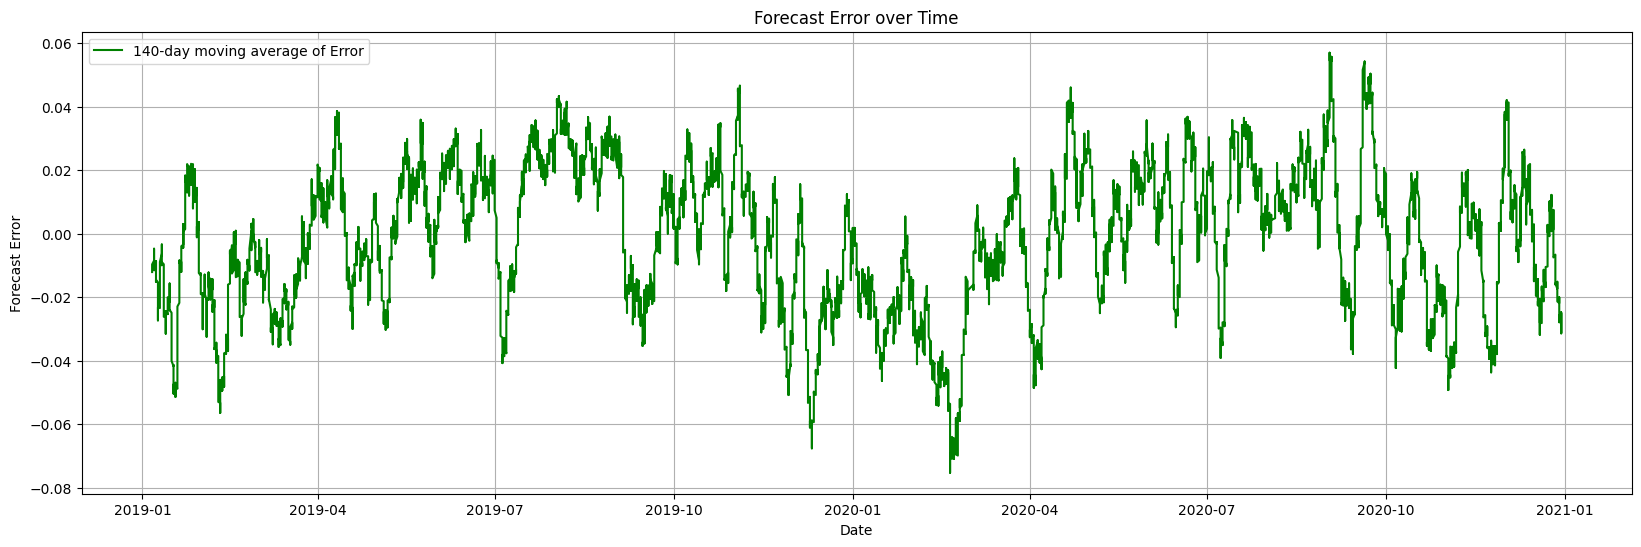

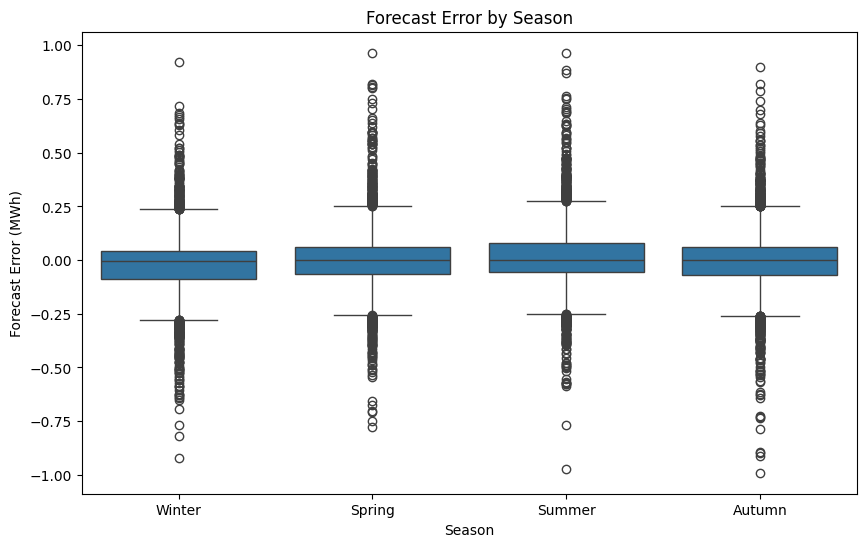

Summary statistics for Forecast Error by Season:
            mean    median       std
season                              
Autumn -0.003263  0.000000  0.141650
Spring  0.000521  0.000000  0.136797
Summer  0.015399  0.000000  0.139605
Winter -0.019901 -0.004877  0.139931


In [111]:
import seaborn as sns

# Compute forecast error (assuming 'forecast' is the day ahead forecast column)
data['error'] = data['energy_FC'] - data['energy_RE']
data['abs_error'] = data['error'].abs()

# Optional: Plot the moving average of the absolute forecast error over time
plt.figure(figsize=(20, 6))
plt.plot(data['date'], data['error'].rolling(window=140).mean(), 
         label='140-day moving average of Error', color='green')
plt.xlabel('Date')
plt.ylabel('Forecast Error')
plt.title('Forecast Error over Time')
plt.legend()
plt.grid()
plt.show()

# Define a function to assign a season based on the month
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to create a 'season' column
data['season'] = data['date'].dt.month.apply(month_to_season)

# Visualize forecast error by season with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='error', 
            data=data, 
            order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.xlabel('Season')
plt.ylabel('Forecast Error (MWh)')
plt.title('Forecast Error by Season')
plt.show()

# Optionally, compute summary statistics for each season
season_stats = data.groupby('season')['error'].agg(['mean', 'median', 'std'])
print("Summary statistics for Forecast Error by Season:")
print(season_stats)


In [112]:
print(data.min())

datetime                       2019-01-01 00:00:00+01:00
load_FC                                           2332.0
load_RE                                           1693.0
Solar_FC                                             0.0
Wind_offshore_FC                                     0.0
                                         ...            
lambda_DA_FC_error_mean_win                   -25.194259
energy_FC_error_mean_win                       -0.094967
error                                          -0.990196
abs_error                                            0.0
season                                            Autumn
Length: 68, dtype: object


In [113]:
data.columns

Index(['datetime', 'load_FC', 'load_RE', 'Solar_FC', 'Wind_offshore_FC',
       'Wind_onshore_FC', 'DK1_Accepted_Down_Volume_(MW)',
       'DK1_Accepted_Up_Volume_(MW)', 'DK1_Imbalance_Price_(EUR)',
       'DK2_Accepted_Down_Volume_(MW)', 'DK2_Accepted_Up_Volume_(MW)',
       'lambda_IM', 'Biomass_RE', 'Fossil_Gas_RE', 'Fossil_Hard_coal_RE',
       'Fossil_Oil_RE', 'Solar_RE', 'Waste_RE', 'Wind_offshore_RE',
       'Wind_onshore_RE', 'lambda_DA_RE', 'lambda_DA_FC', 'energy_RE',
       'energy_FC', 'missing_capacity_RE', 'diff_markets_RE',
       'abs_diff_markets_RE', 'system_state_RE', 'date',
       'lambda_DA_FC_normalized',
       'lambda_DA_FC_zeta_1.0_mu_-25.066601682263762',
       'lambda_DA_FC_zeta_1.0_mu_-0.21790725396844046',
       'lambda_DA_FC_zeta_1.0_mu_0.23181212501333637',
       'lambda_DA_FC_zeta_1.0_mu_34.34509867802557',
       'energy_FC_zeta_0.3550017391908838_mu_0.0',
       'energy_FC_zeta_0.3550017391908838_mu_0.19735466426337947',
       'energy_FC_zeta_0.35

In [114]:
columns_to_plot = ['lambda_DA_FC_zeta_1.0_mu_-25.066601682263762',
       'lambda_DA_FC_zeta_1.0_mu_-0.21790725396844046',
       'lambda_DA_FC_zeta_1.0_mu_0.23181212501333637',
       'lambda_DA_FC_zeta_1.0_mu_34.34509867802557']

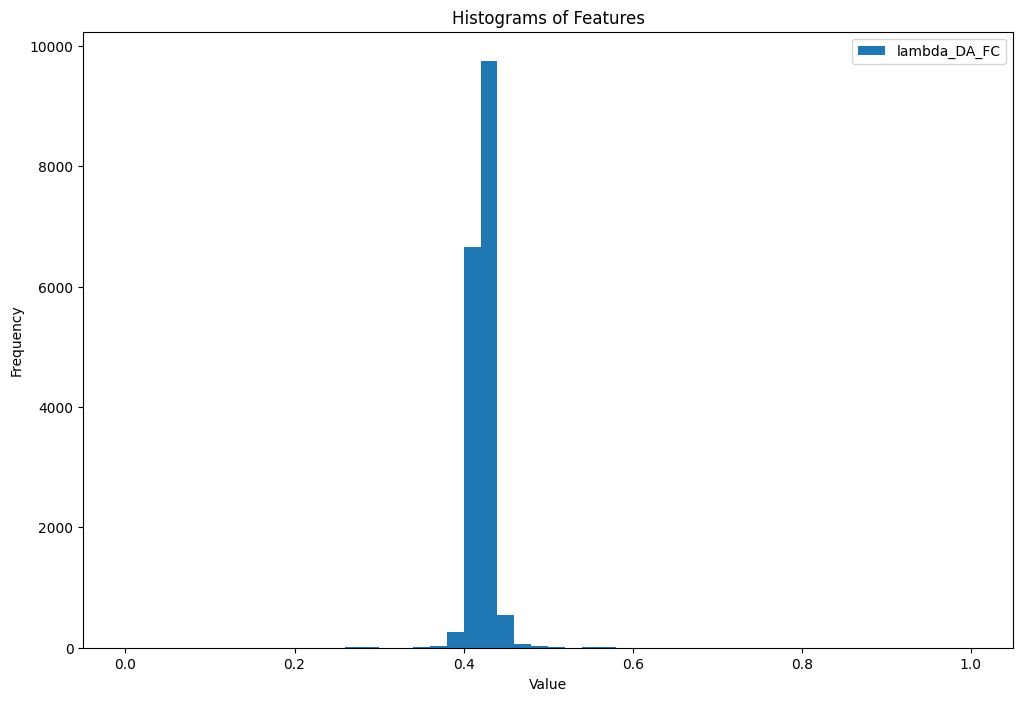

In [127]:
plt.figure(figsize=(12, 8))

plt.hist(data['lambda_DA_FC_normalized'], bins=50, alpha=1, label='lambda_DA_FC')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Features')
plt.legend()
plt.show()

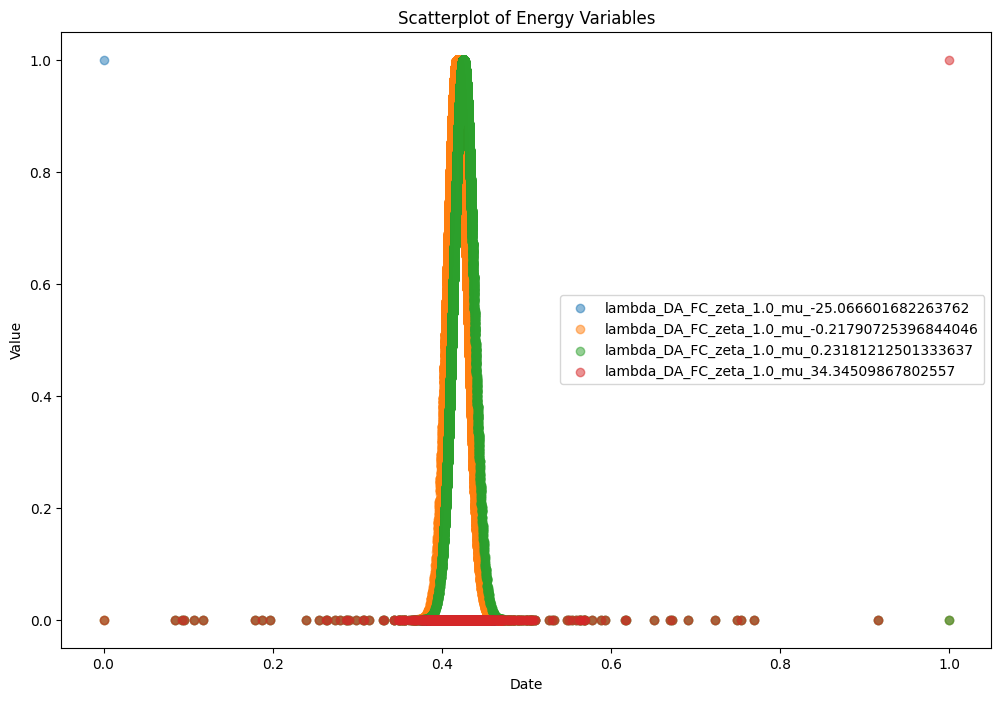

In [126]:
'make a scatterplot with columns_to_plot'
plt.figure(figsize=(12, 8))
for col in columns_to_plot:
    plt.scatter(data['lambda_DA_FC_normalized'], data[col], label=col, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatterplot of Energy Variables')
plt.legend()
plt.show()

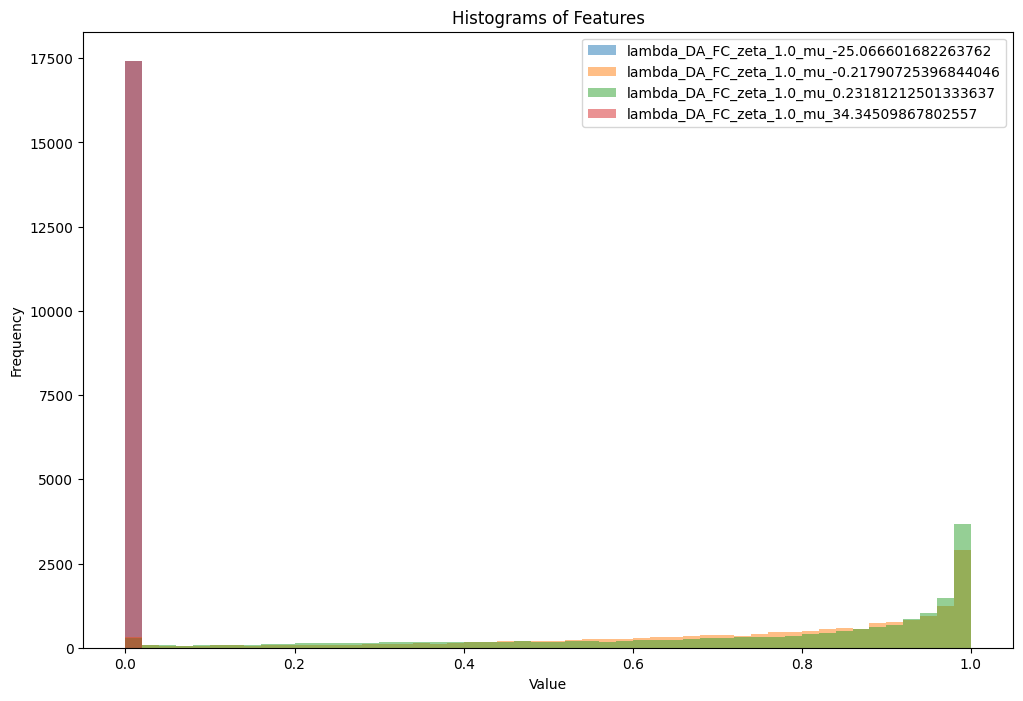

In [116]:
plt.figure(figsize=(12, 8))

# Plot each column
for i, column in enumerate(columns_to_plot):
    plt.hist(data[column], bins=50, alpha=0.5, label=column)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Features')
plt.legend()
plt.show()

In [117]:
data_prices = data[['lambda_DA_RE', 'lambda_DA_FC', 'date']].copy()

# Assuming your DataFrame is called data_prices
# If 'date' is not already a datetime type, convert it
data_prices['date'] = pd.to_datetime(data_prices['date'])

# Rank within each day
data_prices['rank_DA_RE'] = data_prices.groupby('date')['lambda_DA_RE'].rank(ascending=True)
data_prices['rank_DA_FC'] = data_prices.groupby('date')['lambda_DA_FC'].rank(ascending=True)

data_prices['rank_diff'] = data_prices['rank_DA_RE'] - data_prices['rank_DA_FC']
data_prices['rank_diff'] = data_prices['rank_diff'].abs()

# if rank_diff not 0, calculate difference between prices
data_prices['price_diff'] = 0.0
data_prices.loc[data_prices['rank_diff'] != 0, 'price_diff'] = data_prices['lambda_DA_RE'] - data_prices['lambda_DA_FC']
data_prices['price_diff'] = data_prices['price_diff'].abs()

#make rolling window for price_diff
data_prices['price_diff_rolling'] = data_prices['price_diff'].rolling(window=50).mean()


In [118]:
data_prices[data_prices['date'] == '2019-01-24	']

,lambda_DA_RE,lambda_DA_FC,date,rank_DA_RE,rank_DA_FC,rank_diff,price_diff,price_diff_rolling
552,55.98,58.499474,2019-01-24,5.0,7.0,2.0,2.519474,4.455730
553,55.80,50.519350,2019-01-24,3.5,1.0,2.5,5.280650,4.455458
554,55.57,61.457028,2019-01-24,2.0,9.0,7.0,5.887028,3.970347
555,55.33,54.494896,2019-01-24,1.0,4.0,3.0,0.835104,3.987049
556,55.80,52.553873,2019-01-24,3.5,3.0,0.5,3.246127,4.048453
557,60.05,51.925765,2019-01-24,9.0,2.0,7.0,8.124235,3.954455
558,75.98,73.769597,2019-01-24,12.0,11.0,1.0,2.210403,3.970374
559,96.70,92.802997,2019-01-24,18.0,15.0,3.0,3.897003,4.023743
560,109.45,103.239617,2019-01-24,24.0,21.0,3.0,6.210383,4.147951
561,108.56,102.903061,2019-01-24,23.0,20.0,3.0,5.656939,4.252802


In [119]:
data_prices[data_prices['price_diff'] >150]

,lambda_DA_RE,lambda_DA_FC,date,rank_DA_RE,rank_DA_FC,rank_diff,price_diff,price_diff_rolling
5286,53.92,-177.423882,2019-08-09,24.0,1.0,23.0,231.343882,10.51267


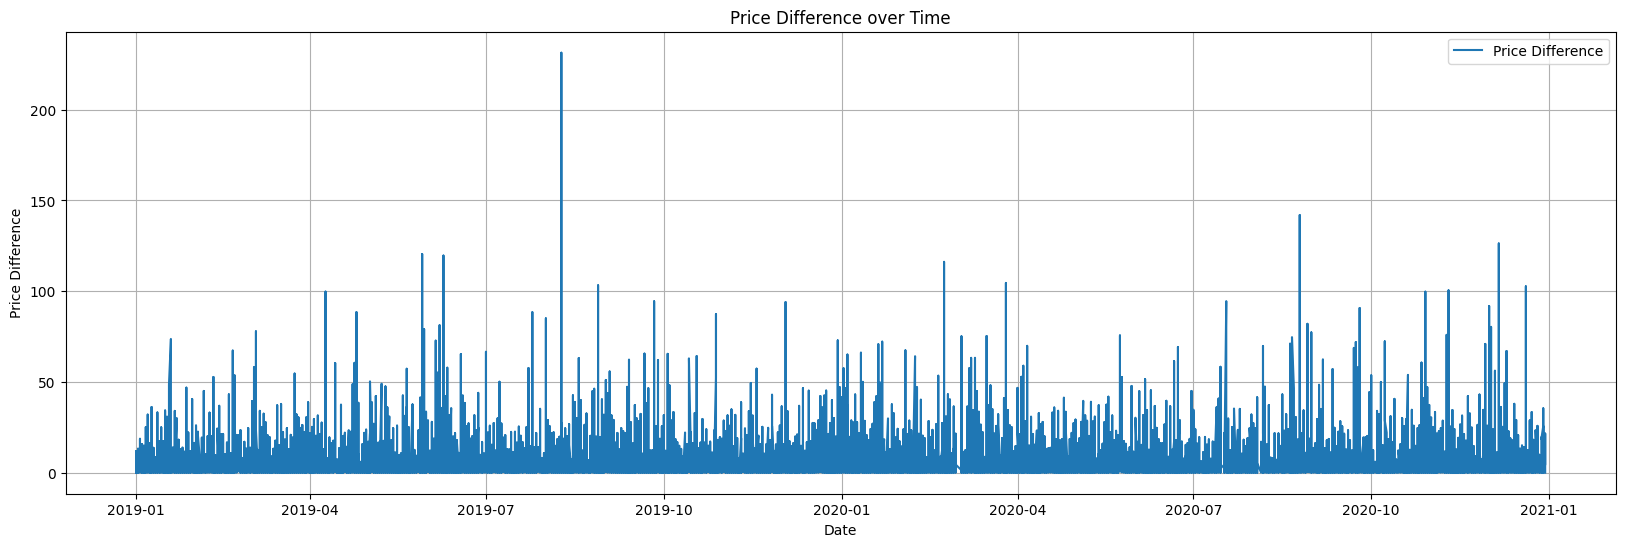

In [120]:
#plot price_diff as timeseries
plt.figure(figsize=(20, 6))
plt.plot(data_prices['date'], data_prices['price_diff'], label='Price Difference')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.title('Price Difference over Time')
plt.legend()
plt.grid()
plt.show()

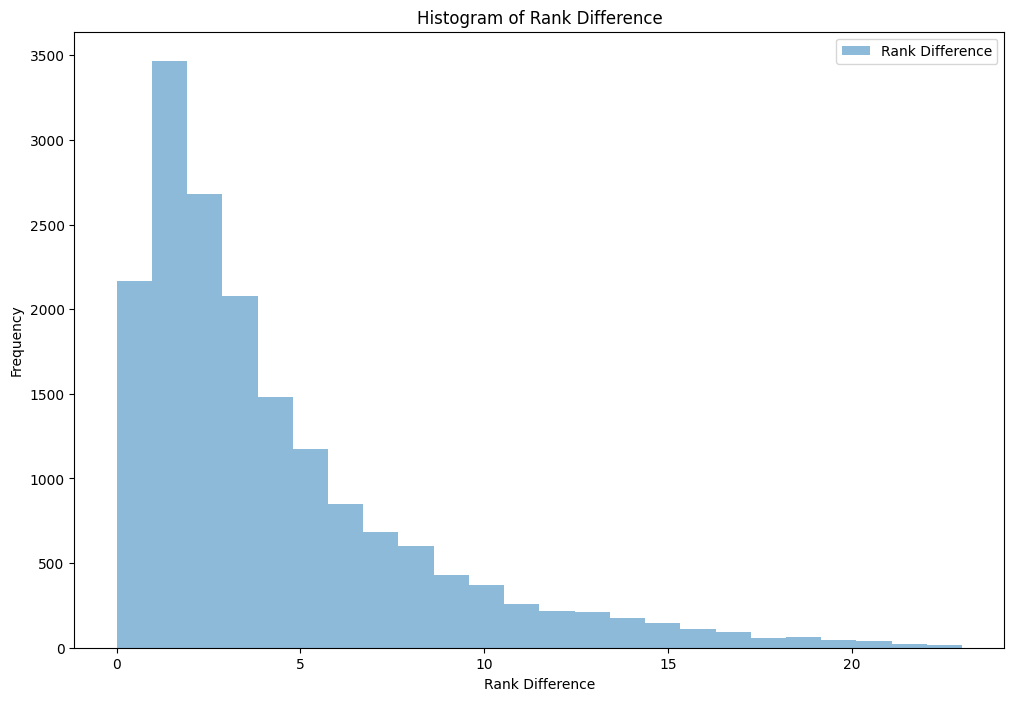

In [121]:
#make histogram of rank_diff
plt.figure(figsize=(12, 8))
plt.hist(data_prices['rank_diff'], bins=24, alpha=0.5, label='Rank Difference')
plt.xlabel('Rank Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Rank Difference')
plt.legend()
plt.show()


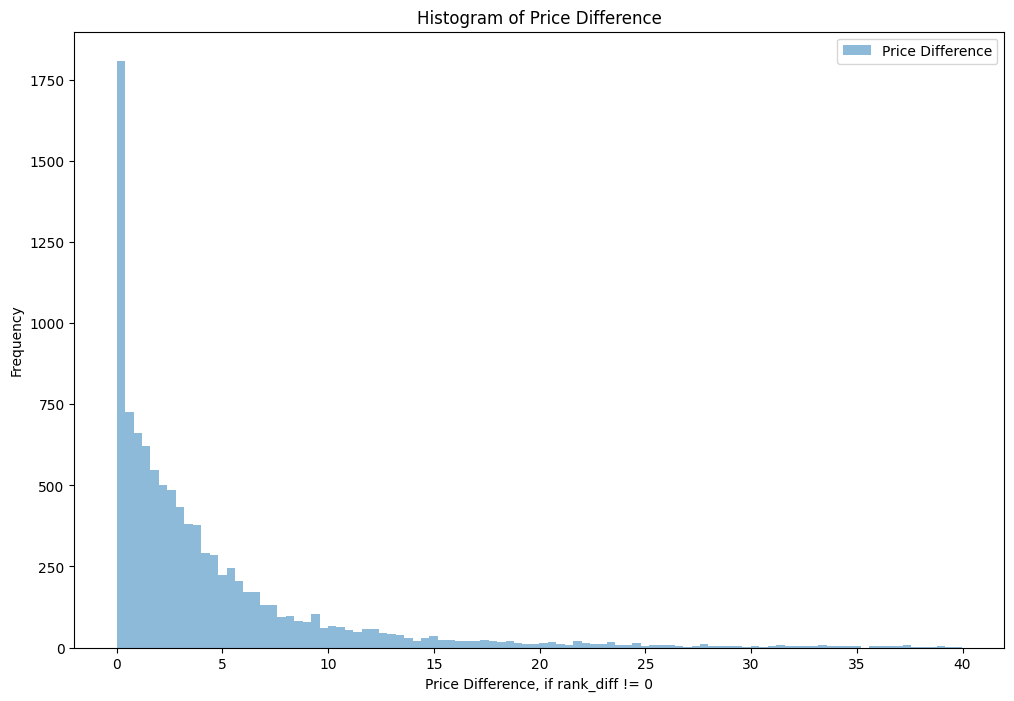

In [122]:
selected_df = data_prices[data_prices['rank_DA_FC']<15].copy()
selected_df = selected_df[selected_df['price_diff'] <40]

#make histogram of rank_diff
plt.figure(figsize=(12, 8))
plt.hist(selected_df['price_diff'], bins=100, alpha=0.5, label='Price Difference')
plt.xlabel('Price Difference, if rank_diff != 0')
plt.ylabel('Frequency')
plt.title('Histogram of Price Difference')
plt.legend()
plt.show()

In [123]:
data_prices

,lambda_DA_RE,lambda_DA_FC,date,rank_DA_RE,rank_DA_FC,rank_diff,price_diff,price_diff_rolling
0,28.32,35.395866,2019-01-01,24.0,24.0,0.0,0.000000,NaN
1,10.07,35.127035,2019-01-01,23.0,23.0,0.0,0.000000,NaN
2,-4.08,-3.707266,2019-01-01,14.0,15.0,1.0,0.372734,NaN
3,-9.91,-17.375766,2019-01-01,6.0,4.0,2.0,7.465766,NaN
4,-7.41,-7.552286,2019-01-01,7.0,10.0,3.0,0.142286,NaN
...,...,...,...,...,...,...,...,...
17515,52.32,30.754735,2020-12-30,16.0,7.0,9.0,21.565265,6.043427
17516,51.13,50.560769,2020-12-30,13.0,15.0,2.0,0.569231,6.054812
17517,45.76,45.448206,2020-12-30,10.0,13.0,3.0,0.311794,6.024415
17518,23.13,31.870248,2020-12-30,7.0,8.0,1.0,8.740248,6.139164
